<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Fig1_CPA_summary_figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive onto colab

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Load the dataset table

In [ ]:
import pandas as pd
import numpy
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
#restrict species to mouse
df = df[df['species'] == 'mouse']
#only keep rows where Modality is sc sn atac multi_rna or multi_atac
df = df[df['Modality'].isin(['sc', 'multi_rna', 'multi_atac', 'sn', 'atac'])]
print(df.shape)
#get the year from the brackets from Author col
df["Year"] = df["Author"].str.extract(r'\((.*?)\)')

df['Sex'] = df['Sex'].apply(lambda x: 'mixed' if 'mixed' in x else x)
#if has ? make it "unclear"
df['Sex'] = df['Sex'].apply(lambda x: 'unclear' if '?' in x else x)
df['Sex'] = df['Sex'].str.lower()

#where Normal is nan set to 1
df["Normal"] = df["Normal"].fillna(1)
#where Sorted is nan set to 0
df["Sorted"] = df["Sorted"].fillna(0)

#for the sake of the visualisation if Sex is not female, set Estrous_stage to nan
df.loc[df["Sex"] != "female", "Estrous_stage"] = np.nan


df['rna_atac'] = df['Modality'].apply(lambda x: 'ATAC' if x in ['atac', 'multi_atac'] else 'RNA')

#if sc_sn_atac is multi_atac or multi_rna turn turn 10X version to Multiome
df.loc[df['Modality'].isin(['multi_atac', 'multi_rna']), '10X version'] = 'Multiome'

#remove where Author is Kover
df = df[~df['Author'].str.startswith("Kover")]
df


(267, 41)


NameError: name 'np' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and it contains a column named 'rna_atac'
# Sorting the DataFrame by 'rna_atac'
df = df.sort_values(by=['rna_atac',"Modality", "10X version"])
#reset index
df.reset_index(drop=True, inplace=True)
df['obs_height'] = df.index / len(df)
df['obs_height']


# Define color maps for each column based on the unique values
color_map_rna_atac = {'RNA': '#0000ff', 'ATAC': '#ff2eff'}
color_map_sc_sn_atac = {
    'sc': 'deepskyblue',
    'multi_rna': 'steelblue',
    'atac': 'hotpink',
    'multi_atac': 'mediumpurple',
    'sn': 'lightblue'
}
color_map_10X = {
    '10XV3': 'lightskyblue',
    'Multiome': 'blueviolet',
    '10XV2': 'paleturquoise',
    '10XV1': 'lightcoral',
    'DROPSEQ': 'cornflowerblue',
    'PARSE_WT_MegaV2': 'lightgreen'
}

# Plotting the horizontal stacked bar charts
plt.figure(figsize=(10, 8))

# First plot for 'rna_atac' at x=0
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=0, color=color_map_rna_atac[row['rna_atac']], height=1.5/len(df))

# Second plot for 'sc_sn_atac' at x=2
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=2, color=color_map_sc_sn_atac[row["Modality"]], height=1.5/len(df))

# Third plot for '10X version' at x=4
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=4, color=color_map_10X[row['10X version']], height=1.5/len(df))

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Remove y-axis ticks and labels
plt.yticks([])

# Invert y-axis to have the first entry at the top
plt.gca().invert_yaxis()


color_map_rna_atac = {'RNA': '#0000ff', 'Chromatin': '#ff2eff'}

color_map_sc_sn_atac = {
    'scRNA': 'deepskyblue',
    'multiRNA': 'steelblue',
    'snATAC': 'hotpink',
    'multiATAC': 'mediumpurple',
    'snRNA': 'lightblue'
}
color_map_10X = {
    '10X V3': 'lightskyblue',
    '10X Multiome': 'blueviolet',
    '10X V2': 'paleturquoise',
    '10X V1': 'lightcoral',
    'DROPSEQ': 'cornflowerblue',
    'PARSE Evercode WT V2': 'lightgreen'
}


# Display legends for all categories
handles_rna_atac = [plt.Line2D([0], [0], color=color_map_rna_atac[key], lw=4) for key in color_map_rna_atac]
handles_sc_sn_atac = [plt.Line2D([0], [0], color=color_map_sc_sn_atac[key], lw=4) for key in color_map_sc_sn_atac]
handles_10X = [plt.Line2D([0], [0], color=color_map_10X[key], lw=4) for key in color_map_10X]

plt.legend(handles_rna_atac + handles_sc_sn_atac + handles_10X,
           list(color_map_rna_atac.keys()) + list(color_map_sc_sn_atac.keys()) + list(color_map_10X.keys()),
           title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()

#save as png and svg
plt.savefig('/content/drive/MyDrive/pituitary_atlas/results/figures/barplot_0924.png', dpi=300, bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/pituitary_atlas/results/figures/barplot_0924.svg', bbox_inches='tight')

# Save as png and svg
plt.savefig('barplot1.png', dpi=300, bbox_inches='tight')
plt.savefig('barplot1.svg', bbox_inches='tight')


plt.show()

In [ ]:
df['Background'] = df['Background'].replace({'129/SvJ and C57BL/6J': 'Mixed', '129/SvJ/129S6/SvEv/C57BL/6J': 'Mixed',
                                             'C57BL/6 x 129sv/ev': 'Mixed', 'C57BL/6- B6;CBA-BiTg mice': 'Mixed',
                                             "FVB/Ant": "Other",
                                             "CD1":"Other",
                                             "CASTJ":"Other",
                                             "AJ":"Other",
                                             "PWKJ":"Other",
                                             "NODJ":"Other",
                                             "WSBJ":"Other",
                                             "NZOJ":"Other",
                                             "129S1J":"Other",
                                             "Balb/c":"Other",
                                             "FVB":"Other",
                                             "UM-HET3":"Other"

                                             })

df["Background"].value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#capitalise all Background and Estrus stage entries
df['Background'] = df['Background'].str.capitalize()
df['Estrous_stage'] = df['Estrous_stage'].str.capitalize()
df['Estrous_stage'] = df['Estrous_stage'].fillna('NA')

df = df.sort_values(by=['Sex',"Normal","Sorted","Estrous_stage",'Background'])
df.reset_index(drop=True, inplace=True)
df['obs_height'] = df.index / len(df)

# Define color maps for each column based on the unique values
# Using distinctly different color palettes for each column
color_map_sex = {'male': '#63b3ed', 'female': '#ffa500', 'unclear': 'aquamarine', 'mixed': 'honeydew'}
color_map_estrous = {'Proestrus': 'lightsalmon', 'Estrus': 'indianred', 'Metestrus': 'darkorange','Diestrus': 'gold', 'Missing': 'gray',"NA": 'lightgray'}
#for background assign as many unique colors as unique entries
color_map_background = {background: color for background, color in zip(df['Background'].unique(), sns.color_palette("pastel", len(df['Background'].unique())))}

color_map_normal = {1: 'moccasin', 0: 'cornflowerblue', 2: 'orange'}
color_map_sorted = {0: 'lightpink', 1: 'lemonchiffon'}

# Plotting the horizontal stacked bar charts
plt.figure(figsize=(10, 8))

# First plot for 'Sex' at x=0
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=0, color=color_map_sex[row['Sex']], height=1/len(df))


for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=2, color=color_map_estrous[row['Estrous_stage']], height=1/len(df))

for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=4, color=color_map_background[row['Background']], height=1/len(df))


# Second plot for 'Normal' at x=2
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=6, color=color_map_normal[row['Normal']], height=1/len(df))

# Third plot for 'Sorted' at x=4
for i, row in df.iterrows():
    plt.barh(row['obs_height'], width=2, left=8, color=color_map_sorted[row['Sorted']], height=1/len(df))


# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Remove y-axis ticks and labels
plt.yticks([])

# Invert y-axis to have the first entry at the top
plt.gca().invert_yaxis()

# Display legends for all categories


color_map_sex = {'Male': '#63b3ed', 'Female': '#ffa500', 'Unclear': 'aquamarine', 'Mixed': 'honeydew'}

color_map_normal = {"Control": 'moccasin', "Perturbed": 'cornflowerblue', "Organoid": 'orange'}
color_map_sorted = {"Whole": 'lightpink', "Sorted": 'lemonchiffon'}


handles_sex = [plt.Line2D([0], [0], color=color_map_sex[key], lw=4) for key in color_map_sex]
handles_estrous = [plt.Line2D([0], [0], color=color_map_estrous[key], lw=4) for key in color_map_estrous]
handles_background = [plt.Line2D([0], [0], color=color_map_background[key], lw=4) for key in color_map_background]
handles_normal = [plt.Line2D([0], [0], color=color_map_normal[key], lw=4) for key in color_map_normal]
handles_sorted = [plt.Line2D([0], [0], color=color_map_sorted[key], lw=4) for key in color_map_sorted]

plt.legend(handles_sex +  handles_estrous + handles_background + handles_normal + handles_sorted,
           list(color_map_sex.keys()) + list(color_map_estrous.keys()) + list(color_map_background.keys()) + list(color_map_normal.keys()) + list(color_map_sorted.keys()),
           title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()

# Save as png and svg
plt.savefig('barplot2.png', dpi=300, bbox_inches='tight')
plt.savefig('barplot2.svg', bbox_inches='tight')


plt.savefig('/content/drive/MyDrive/pituitary_atlas/results/figures/barplot2_0904.png', dpi=300, bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/pituitary_atlas/results/figures/barplot2_0904.svg', bbox_inches='tight')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
# Convert 'Age_numeric' to numeric, if not already done
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# Define the number of bins to use consistently
n_bins = 30

# First, calculate the histogram to find the peak heights
hist, bin_edges = np.histogram(df['Age_numeric'].dropna(), bins=n_bins)
max_height = np.max(hist)  # Height of the highest peak
sorted_hist = np.sort(hist)[::-1]
second_highest = sorted_hist[1]  # Height of the second highest peak

#round max_height and second_highest to closest int
max_height = round(max_height)
second_highest = round(second_highest)

# Set y-limits based on the actual peak heights
top_ylim = (max_height - 5, max_height + 1)  # Top plot: around the highest peak
bottom_ylim = (0, second_highest + 5)  # Bottom plot: up to the second peak + buffer

# Create figure with 2/3 height/width ratio
width = 2.5  # Width in inches
height = width * (2/4)  # Height in inches (2/3 of width)
fig = plt.figure(figsize=(width, height), dpi=300)

# Define the heights ratio for the two axes
gs = fig.add_gridspec(2, 1, height_ratios=[0.5, 3], hspace=0.05)

# Create the two axes
ax1 = fig.add_subplot(gs[0])  # top subplot for high values
ax2 = fig.add_subplot(gs[1])  # bottom subplot for the main distribution

# Create histograms on both axes with the same number of bins
sns.histplot(data=df, x='Age_numeric', kde=False, color='#0000ff', ax=ax1, bins=n_bins)
sns.histplot(data=df, x='Age_numeric', kde=False, color='#0000ff', ax=ax2, bins=n_bins)

# Set the y-limits for each axis
ax1.set_ylim(top_ylim)
ax2.set_ylim(bottom_ylim)

# Hide the x-axis labels and ticks of the top subplot
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_xlabel('')

# For ax1 (top plot), skip the first tick and ensure only integers
# Filter valid integer ticks within limits for ax1
valid_ticks_ax1 = [
    max_height
]

# Skip first tick only if more than one exists
if len(valid_ticks_ax1) > 1:
    ax1.set_yticks(valid_ticks_ax1[1:])
else:
    ax1.set_yticks(valid_ticks_ax1)

# Same for ax2 without skipping the first tick
valid_ticks_ax2 = [
    int(round(y)) for y in ax2.get_yticks()
    if bottom_ylim[0] <= y <= bottom_ylim[1] and abs(y - round(y)) < 1e-6
]
ax2.set_yticks(valid_ticks_ax2)


#make sure y ticks are only integers


# Customize the bottom subplot
ax2.set_xlabel('Age (days)', fontsize=8)
ax2.set_ylabel('Frequency', fontsize=8)

# Add ylabel to the first subplot but make it empty (to align with the bottom plot)
ax1.set_ylabel('')

# Add title to the entire figure
fig.suptitle('Distribution of Age (RNA)', fontsize=8, fontweight='bold', y=0.98)

# Set tick sizes for both axes
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

# Remove top and right spines for both subplots
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# Adjust layout
plt.tight_layout()

# Save figures
plt.savefig('age_distribution_histogram_broken_y_rna.png', dpi=300, bbox_inches='tight')
plt.savefig('age_distribution_histogram_broken_y_rna.svg', bbox_inches='tight')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_atac = df[df['rna_atac'] == 'ATAC']
df_rna = df[df['rna_atac'] == 'RNA']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def process_and_plot(df, data_type):
    # Step 1: Sum the N_cells for each author
    author_sum = df.groupby('Author')['n_cells'].sum().reset_index()

    # Step 2: Create a cumulative sum of N_cells over the years
    yearly_data = df.groupby('Year').agg({
        'n_cells': 'sum',
        'Author': 'nunique',
        'SRA_ID': 'nunique'  # Count unique papers per year
    }).reset_index()
    yearly_data = yearly_data.sort_values('Year')
    yearly_data['Cumulative_N_cell'] = yearly_data['n_cells'].cumsum()

    # Step 3: Plot the cumulative sum
    plt.figure(figsize=(4, 3), dpi=300)
    sns.set_style("whitegrid")

    plt.plot(yearly_data['Year'], yearly_data['Cumulative_N_cell'], '-', color='#4C72B0')

    # Normalize author counts for scatter plot sizes
    max_authors = yearly_data['Author'].max()
    sizes = (yearly_data['Author'] / max_authors) * 100  # Scale to 0-100 range

    scatter = plt.scatter(yearly_data['Year'], yearly_data['Cumulative_N_cell'],
                          s=sizes, color='#4C72B0', alpha=0.7)

    # Add labels under each point
    for i, row in yearly_data.iterrows():
        plt.annotate(f"{row['SRA_ID']}\n{row['n_cells']}",
                     (row['Year'], row['Cumulative_N_cell']),
                     xytext=(0, -15), textcoords='offset points',
                     ha='center', va='top', fontsize=6)

    plt.title(f'Cumulative #cells over the years ({data_type})', fontsize=10)
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('Cumulative cells', fontsize=8)

    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add total papers and cells to the plot
    total_samples = yearly_data['SRA_ID'].sum()
    total_cells = yearly_data['n_cells'].sum()
    total_papers = yearly_data['Author'].sum()
    plt.text(0.02, 0.98, f'Total papers: {total_papers}\nTotal samples: {total_samples}\nTotal cells: {total_cells:,}',
             transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')

    plt.tight_layout()
    plt.savefig(f'cumulative_ncell_over_years_{data_type.lower()}.png', dpi=300, bbox_inches='tight')

    #save as svg
    plt.savefig(f'cumulative_ncell_over_years_{data_type.lower()}.svg', bbox_inches='tight')
    plt.close()

    # Step 4: Calculate and print total unique Authors and total N_cells
    total_unique_authors = df['Author'].nunique()

    print(f"\nResults for {data_type}:")
    print(f"Total unique Authors: {total_unique_authors}")
    print(f"Total N_cells: {total_cells:,}")
    print(f"Total Papers: {total_papers}")

    # Print top 5 authors by N_cell count
    print(f"\nTop 5 Authors by N_cell count ({data_type}):")
    print(author_sum.sort_values('n_cells', ascending=False).head())

# Process RNA data
process_and_plot(df_rna, "RNA")

# Process ATAC data
process_and_plot(df_atac, "ATAC")


KeyError: 'rna_atac'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

def plot_combined_rna_atac(df_rna, df_atac):
    # Process RNA data
    rna_yearly = df_rna.groupby('Year').agg({
        'n_cells': 'sum',
        'Author': 'nunique',
        'SRA_ID': 'nunique'
    }).reset_index()
    rna_yearly = rna_yearly.sort_values('Year')
    rna_yearly['Cumulative_N_cell'] = rna_yearly['n_cells'].cumsum()

    # Process ATAC data
    atac_yearly = df_atac.groupby('Year').agg({
        'n_cells': 'sum',
        'Author': 'nunique',
        'SRA_ID': 'nunique'
    }).reset_index()
    atac_yearly = atac_yearly.sort_values('Year')
    atac_yearly['Cumulative_N_cell'] = atac_yearly['n_cells'].cumsum()

    # Normalize author counts for scatter plot sizes
    max_authors_rna = rna_yearly['Author'].max()
    sizes_rna = (rna_yearly['Author'] / max_authors_rna) * 100  # Scale to 0-100 range

    max_authors_atac = atac_yearly['Author'].max()
    sizes_atac = (atac_yearly['Author'] / max_authors_atac) * 100  # Scale to 0-100 range

    # Plot both datasets
    plt.figure(figsize=(5, 4), dpi=300)
    sns.set_style("whitegrid")

    # RNA plot (blue)
    plt.plot(rna_yearly['Year'], rna_yearly['Cumulative_N_cell'], '-', color='#0000ff', label='RNA')
    scatter_rna = plt.scatter(rna_yearly['Year'], rna_yearly['Cumulative_N_cell'],
                       s=sizes_rna, color='#0000ff', alpha=0.7)

    # ATAC plot (magenta)
    plt.plot(atac_yearly['Year'], atac_yearly['Cumulative_N_cell'], '-', color='#ff2eff', label='ATAC')
    scatter_atac = plt.scatter(atac_yearly['Year'], atac_yearly['Cumulative_N_cell'],
                      s=sizes_atac, color='#ff2eff', alpha=0.7)

    # Add annotations for RNA - only showing number of samples as integer with bold text
    for i, row in rna_yearly.iterrows():
        plt.annotate(f"{int(row['SRA_ID'])}",
                    (row['Year'], row['Cumulative_N_cell']),
                    xytext=(0, -15), textcoords='offset points',
                    ha='center', va='top', fontsize=8, color='#0000ff',
                    weight='bold')

    # Add annotations for ATAC - only showing number of samples as integer with bold text
    for i, row in atac_yearly.iterrows():
        plt.annotate(f"{int(row['SRA_ID'])}",
                    (row['Year'], row['Cumulative_N_cell']),
                    xytext=(0, 15), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8, color='#ff2eff',
                    weight='bold')

    plt.title('Cumulative cells over the years (RNA vs ATAC)', fontsize=12, weight='bold')
    plt.xlabel('Year', fontsize=11)
    plt.ylabel('Cumulative cells', fontsize=11)

    # Ensure y-axis values are displayed as integers
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add legend
    plt.legend(fontsize=8)

    # Add total papers and cells to the plot for both datasets
    rna_total_samples = int(rna_yearly['SRA_ID'].sum())
    rna_total_cells = int(rna_yearly['n_cells'].sum())
    rna_total_papers = int(rna_yearly['Author'].sum())

    atac_total_samples = int(atac_yearly['SRA_ID'].sum())
    atac_total_cells = int(atac_yearly['n_cells'].sum())
    atac_total_papers = int(atac_yearly['Author'].sum())

    text_info = (
        f'RNA:\n'
        f'  Total papers: {rna_total_papers}\n'
        f'  Total samples: {rna_total_samples}\n'
        f'  Total cells: {rna_total_cells:,}\n\n'
        f'ATAC:\n'
        f'  Total papers: {atac_total_papers}\n'
        f'  Total samples: {atac_total_samples}\n'
        f'  Total cells: {atac_total_cells:,}'
    )

    plt.text(0.02, 0.98, text_info,
            transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', weight='bold',
            bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Save as PNG and SVG
    plt.savefig('cumulative_ncell_over_years_combined.png', dpi=300, bbox_inches='tight')
    plt.savefig('cumulative_ncell_over_years_combined.svg', bbox_inches='tight')

    plt.show()

    # Print summary statistics
    print("\nRNA Summary:")
    print(f"Total unique Authors: {df_rna['Author'].nunique()}")
    print(f"Total N_cells: {rna_total_cells:,}")
    print(f"Total Papers: {rna_total_papers}")

    print("\nATAC Summary:")
    print(f"Total unique Authors: {df_atac['Author'].nunique()}")
    print(f"Total N_cells: {atac_total_cells:,}")
    print(f"Total Papers: {atac_total_papers}")

# Call the function
plot_combined_rna_atac(df_rna, df_atac)

NameError: name 'df_rna' is not defined

/tmp/ipython-input-3889564702.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


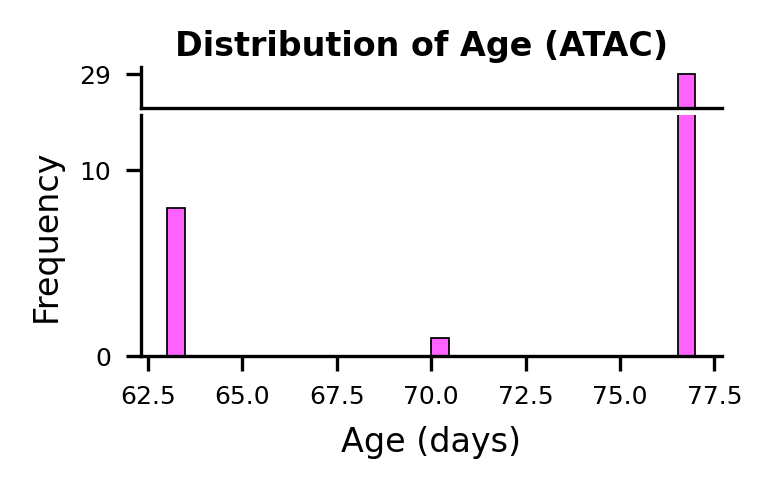

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
#restrict species to mouse
df = df[df['species'] == 'mouse']
#only keep rows where sc_sn_atac is sc sn atac multi_rna or multi_atac
df = df[df['Modality'].isin([ 'multi_atac',  'atac'])]
df = df[~df['Author'].str.startswith("Kover")]
df


# Assuming df is your DataFrame
# Convert 'Age_numeric' to numeric, if not already done
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# Define the number of bins to use consistently
n_bins = 30

# First, calculate the histogram to find the peak heights
hist, bin_edges = np.histogram(df['Age_numeric'].dropna(), bins=n_bins)
max_height = np.max(hist)  # Height of the highest peak
sorted_hist = np.sort(hist)[::-1]
second_highest = sorted_hist[1]  # Height of the second highest peak




#round max_height and second_highest to closest int
max_height = round(max_height)
second_highest = round(second_highest)

# Set y-limits based on the actual peak heights
top_ylim = (max_height - 5, max_height + 1)  # Top plot: around the highest peak
bottom_ylim = (0, second_highest + 5)  # Bottom plot: up to the second peak + buffer

# Create figure with 2/3 height/width ratio
width = 2.5  # Width in inches
height = width * (2/4)  # Height in inches (2/3 of width)
fig = plt.figure(figsize=(width, height), dpi=300)

# Define the heights ratio for the two axes
gs = fig.add_gridspec(2, 1, height_ratios=[0.5, 3], hspace=0.05)

# Create the two axes
ax1 = fig.add_subplot(gs[0])  # top subplot for high values
ax2 = fig.add_subplot(gs[1])  # bottom subplot for the main distribution

# Create histograms on both axes with the same number of bins
sns.histplot(data=df, x='Age_numeric', kde=False, color='#ff2eff', ax=ax1, bins=n_bins)
sns.histplot(data=df, x='Age_numeric', kde=False, color='#ff2eff', ax=ax2, bins=n_bins)

# Set the y-limits for each axis
ax1.set_ylim(top_ylim)
ax2.set_ylim(bottom_ylim)

# Hide the x-axis labels and ticks of the top subplot
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_xlabel('')

# For ax1 (top plot), skip the first tick and ensure only integers
# Filter valid integer ticks within limits for ax1
valid_ticks_ax1 = [
    max_height
]

# Skip first tick only if more than one exists
if len(valid_ticks_ax1) > 1:
    ax1.set_yticks(valid_ticks_ax1[1:])
else:
    ax1.set_yticks(valid_ticks_ax1)

# Same for ax2 without skipping the first tick
valid_ticks_ax2 = [
    int(round(y)) for y in ax2.get_yticks()
    if bottom_ylim[0] <= y <= bottom_ylim[1] and abs(y - round(y)) < 1e-6
]
ax2.set_yticks(valid_ticks_ax2)


#make sure y ticks are only integers


# Customize the bottom subplot
ax2.set_xlabel('Age (days)', fontsize=8)
ax2.set_ylabel('Frequency', fontsize=8)

# Add ylabel to the first subplot but make it empty (to align with the bottom plot)
ax1.set_ylabel('')

# Add title to the entire figure
fig.suptitle('Distribution of Age (ATAC)', fontsize=8, fontweight='bold', y=0.98)

# Set tick sizes for both axes
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

# Remove top and right spines for both subplots
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# Adjust layout
plt.tight_layout()

# Save figures
plt.savefig('age_distribution_histogram_broken_y_atac.png', dpi=300, bbox_inches='tight')
plt.savefig('age_distribution_histogram_broken_y_atac.svg', bbox_inches='tight')

plt.show()

In [ ]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.9.15.0.37.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.4
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.21.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.8.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
clara